# Car Evaluation Dataset

In [592]:
import pandas as pd
import numpy as np

In [593]:
from matplotlib import pyplot as plt
import seaborn as sns

Importing dataset from https://archive.ics.uci.edu/ml/datasets/Car+Evaluation

## Data Preprocessing

### Importing the dataset

In [594]:
dataset = pd.read_csv("/carevaluation.csv")

In [595]:
dataset.head()

,no,buying,maint,doors,persons,lug_boot,safety,class
0,0,vhigh,vhigh,2,2,small,low,unacc
1,1,vhigh,vhigh,2,2,small,med,unacc
2,2,vhigh,vhigh,2,2,small,high,unacc
3,3,vhigh,vhigh,2,2,med,low,unacc
4,4,vhigh,vhigh,2,2,med,med,unacc


In [596]:
dataset.shape

(1728, 8)

In [597]:
dataset.describe(include= 'all')

,no,buying,maint,doors,persons,lug_boot,safety,class
count,1728.000000,1728,1728,1728.000000,1728.000000,1728,1728,1728
unique,NaN,4,4,NaN,NaN,3,3,4
top,NaN,vhigh,vhigh,NaN,NaN,small,high,unacc
freq,NaN,432,432,NaN,NaN,576,576,1210
mean,863.500000,NaN,NaN,3.500000,3.666667,NaN,NaN,NaN
std,498.974949,NaN,NaN,1.118358,1.247580,NaN,NaN,NaN
min,0.000000,NaN,NaN,2.000000,2.000000,NaN,NaN,NaN
25%,431.750000,NaN,NaN,2.750000,2.000000,NaN,NaN,NaN
50%,863.500000,NaN,NaN,3.500000,4.000000,NaN,NaN,NaN
75%,1295.250000,NaN,NaN,4.250000,5.000000,NaN,NaN,NaN


### Encoding categorical data

In [598]:
from sklearn.preprocessing import LabelEncoder

In [599]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [600]:
dataset = MultiColumnLabelEncoder(columns = ['buying','maint','lug_boot','safety','class']).fit_transform(dataset)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


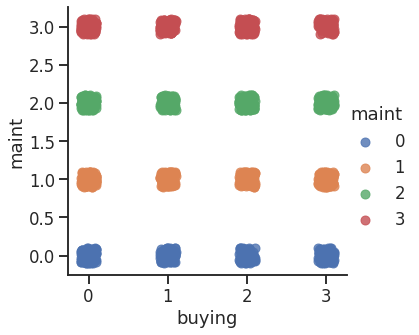

In [601]:
import seaborn as sns

sns.lmplot(dataset.columns[1], dataset.columns[2],data=dataset, fit_reg=False, x_jitter=0.1, y_jitter=0.1, hue = dataset.columns[2])
plt.show()


### Split feature construction and class

In [602]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [603]:
print(X)

[[3 3 2 2 2 1]
 [3 3 2 2 2 2]
 [3 3 2 2 2 0]
 ...
 [1 1 5 5 0 1]
 [1 1 5 5 0 2]
 [1 1 5 5 0 0]]


In [604]:
print(y)

[2 2 2 ... 2 1 3]


### Splitting the dataset into the Training set and Test set

In [605]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Train the model

In [606]:
from sklearn.neural_network import MLPClassifier

In [607]:
mlp = MLPClassifier(max_iter=500, activation = 'relu', momentum=0.2, power_t=0.3)
mlp

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.2, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.3, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [608]:
mlp.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.2, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.3, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

# Predict

In [609]:
y_pred = mlp.predict(X_test)

In [610]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

confusion_matrix(y_test,y_pred)

array([[106,   1,  10,   1],
       [  0,  18,   0,   0],
       [ 10,   5, 352,   0],
       [  1,   1,   0,  14]])

In [611]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90       118
           1       0.72      1.00      0.84        18
           2       0.97      0.96      0.97       367
           3       0.93      0.88      0.90        16

    accuracy                           0.94       519
   macro avg       0.88      0.93      0.90       519
weighted avg       0.95      0.94      0.94       519



In [612]:
accuracy_score(y_test, y_pred)

0.9441233140655106

In [613]:
y_array = {'y_test': y_test,
        'y_pred': y_pred}
y_data = pd.DataFrame(y_array)

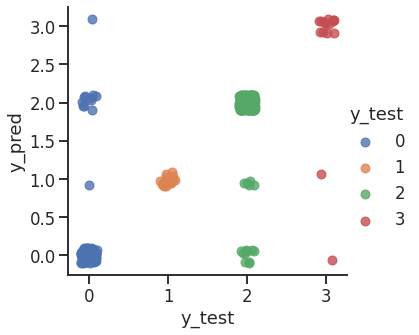

In [614]:
sns.lmplot(x=y_data.columns[0], y=y_data.columns[1], data=y_data, fit_reg=False, x_jitter=0.1,
            y_jitter=0.1, hue = y_data.columns[0])
plt.show()